In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from benchmarking import benchmarking

In [3]:
lc_list = [0.3, 0.1, 0.05, 0.025, 0.0175, 0.01, 0.0075, 0.005, 0.0035]
lc_list = [0.3, 0.1, 0.05, 0.025, 0.0175, 0.01, 0.0075]

benchmark_data = pd.DataFrame({
    "dofs": np.array([], dtype=np.int64),
    "Approach": np.array([], dtype=str),
    # "Newton_iteration": np.array([], dtype=np.int64),
    "matrix_assembling": np.array([], dtype=np.float64),
    "matrix_assembling(total)": np.array([], dtype=np.float64),
    "constitutive_model_update": np.array([], dtype=np.float64),
    "constitutive_model_update(total)": np.array([], dtype=np.float64),
})

for lc in lc_list:
    print(f"lc = {lc}")
    data_list = benchmarking(lc)
    for data in data_list:
        benchmark_data.loc[len(benchmark_data.index)] = data

lc = 0.3
Approach: Numba
1st Numba pass: 1.307464973
2nd Numba pass: 0.0013259670000000002
Newton iterations in total = 47
Approach: interpolation
Newton iterations in total = 47
lc = 0.1
Approach: Numba
1st Numba pass: 0.509666598
2nd Numba pass: 0.001350717
Newton iterations in total = 50
Approach: interpolation
Newton iterations in total = 50
lc = 0.05
Approach: Numba
1st Numba pass: 0.46605053900000004
2nd Numba pass: 0.0019108870000000002
Newton iterations in total = 50
Approach: interpolation
Newton iterations in total = 50
lc = 0.025
Approach: Numba
1st Numba pass: 0.5518953590000001
2nd Numba pass: 0.004166942
Newton iterations in total = 54
Approach: interpolation
Newton iterations in total = 54
lc = 0.0175
Approach: Numba
1st Numba pass: 0.49237595100000003
2nd Numba pass: 0.0073146700000000005
Newton iterations in total = 54
Approach: interpolation
Newton iterations in total = 54
lc = 0.01
Approach: Numba
1st Numba pass: 0.501652008
2nd Numba pass: 0.019962623000000002
Newto

In [4]:
print(benchmark_data.head())

   dofs       Approach  matrix_assembling  matrix_assembling(total)  \
0    51          Numba           0.000045                  0.002097   
1    51  interpolation           0.000050                  0.002335   
2   423          Numba           0.000257                  0.012871   
3   423  interpolation           0.000273                  0.013665   
4  1605          Numba           0.000965                  0.048238   

   constitutive_model_update  constitutive_model_update(total)  
0                   0.000545                          0.025628  
1                   0.003710                          0.174385  
2                   0.000744                          0.037178  
3                   0.003878                          0.193904  
4                   0.001365                          0.068248  


In [6]:
dofs = benchmark_data["dofs"].unique()
approaches = benchmark_data["Approach"].unique()

In [10]:
def do_plotting(events):
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    for approach in approaches:
        for event in events:
            data = benchmark_data[benchmark_data["Approach"] == approach]
            axes[0].loglog(dofs, data[event], 'o-', label=approach+": "+event)

    for approach in approaches:
        for event in events:
            data = benchmark_data[benchmark_data["Approach"] == approach]
            axes[1].plot(dofs, data[event], 'o-', label=approach+": "+event)

    axes[0].set_title('Log scale')
    axes[1].set_title('Standard scale')
    for i in range(2):
        axes[i].set_xlabel("DoFs of the scalar quadrature functional space of degree 2")
        axes[i].set_ylabel("Time (s)")
        axes[i].legend()
        axes[i].grid()
    # fig.savefig("benchmarking.png")
    # fig.suptitle('Solving an elastoplastic problem via different approaches: interpolation, numba, jax')

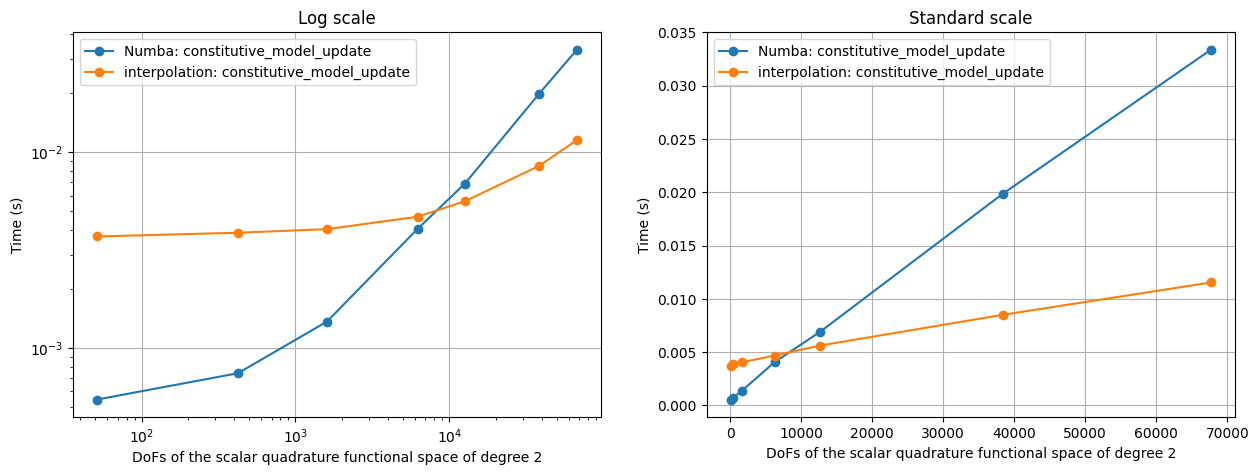

In [11]:
events = ["constitutive_model_update"]
do_plotting(events)


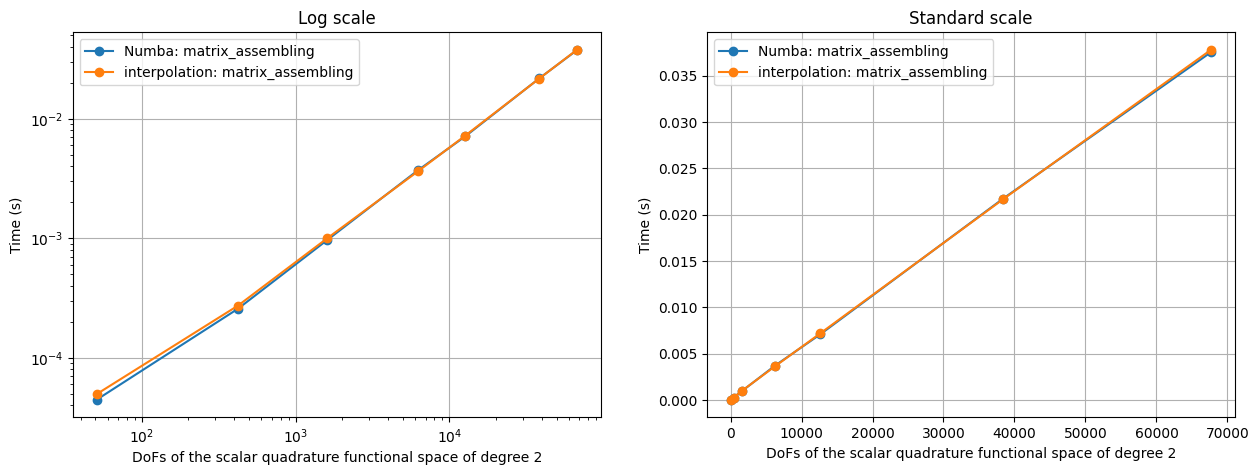

In [12]:
events = ["matrix_assembling"]
do_plotting(events)

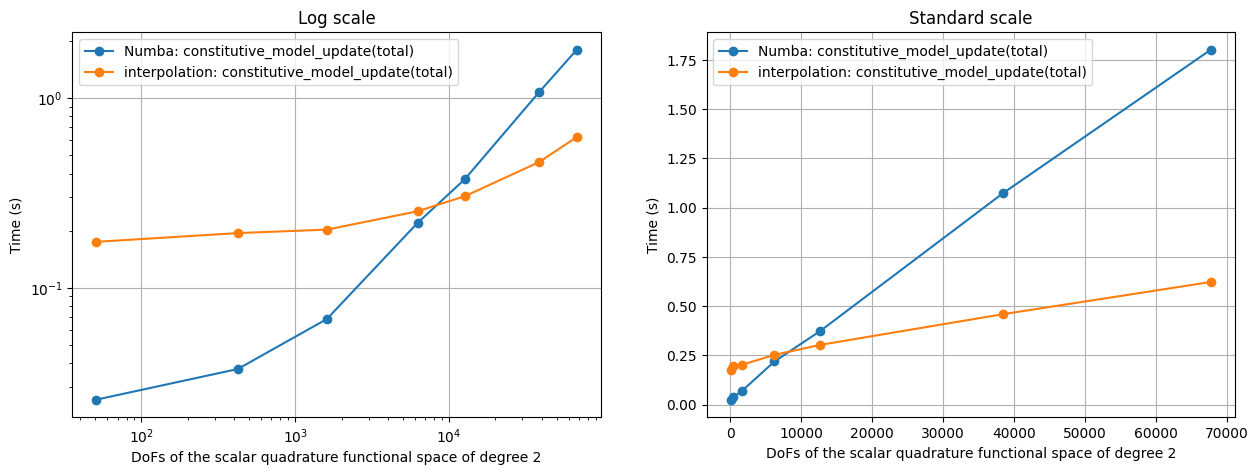

In [14]:
events = ["constitutive_model_update(total)"]
do_plotting(events)

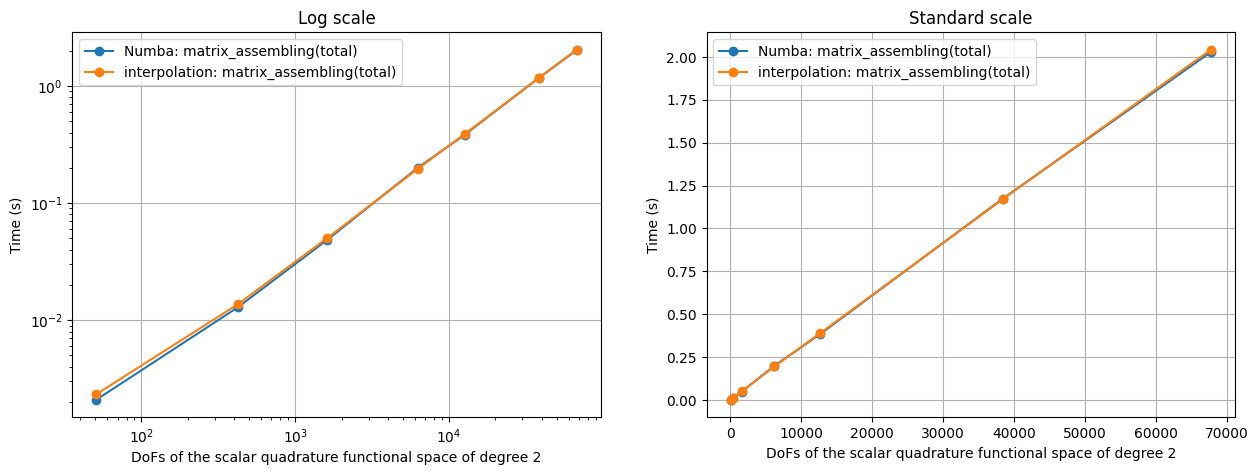

In [13]:
events = ["matrix_assembling(total)"]
do_plotting(events)

In [ ]:
events = ["matrix_assembling(total)", "constitutive_model_update(total)"]
